In [1]:
from os.path import join

import sympy
from sympy import Symbol, sqrt, cos, pi, symbols
import numpy as np
import matplotlib.pylab as plt

import qnet
from qnet.algebra import *

import QDYN

from src.notebook_plots_v1 import plot_bs_decay, display_hamiltonian, display_eq, show_summary_dicke
from src.single_sided_network_v1 import network_slh
from src.dicke_single_model_v1 import write_dicke_single_model, err_dicke_single

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
qnet.init_printing()

$
\newcommand{ket}[1]{\vert #1 \rangle}
\newcommand{bra}[1]{\langle #1 \vert}
\newcommand{Op}[1]{\hat{#1}}
$

# Single-excitation Dicke states for 4 Nodes with strong decay

Does optimization of the single-excitation Dicke state work better than the N/2 Dicke state?

##  Optimization of Dicke state at T=50

In [4]:
slh = network_slh(n_cavity=2, n_nodes=4, topology='driven_bs_fb')

In [5]:
write_dicke_single_model(
    slh, rf='./data/4nodes_single_kappa1e0_T050_traj', T=50, theta=0, nt=500,
    kappa=1.0, E0_cycles=2, mcwf=True, non_herm=True, lambda_a=0.001)

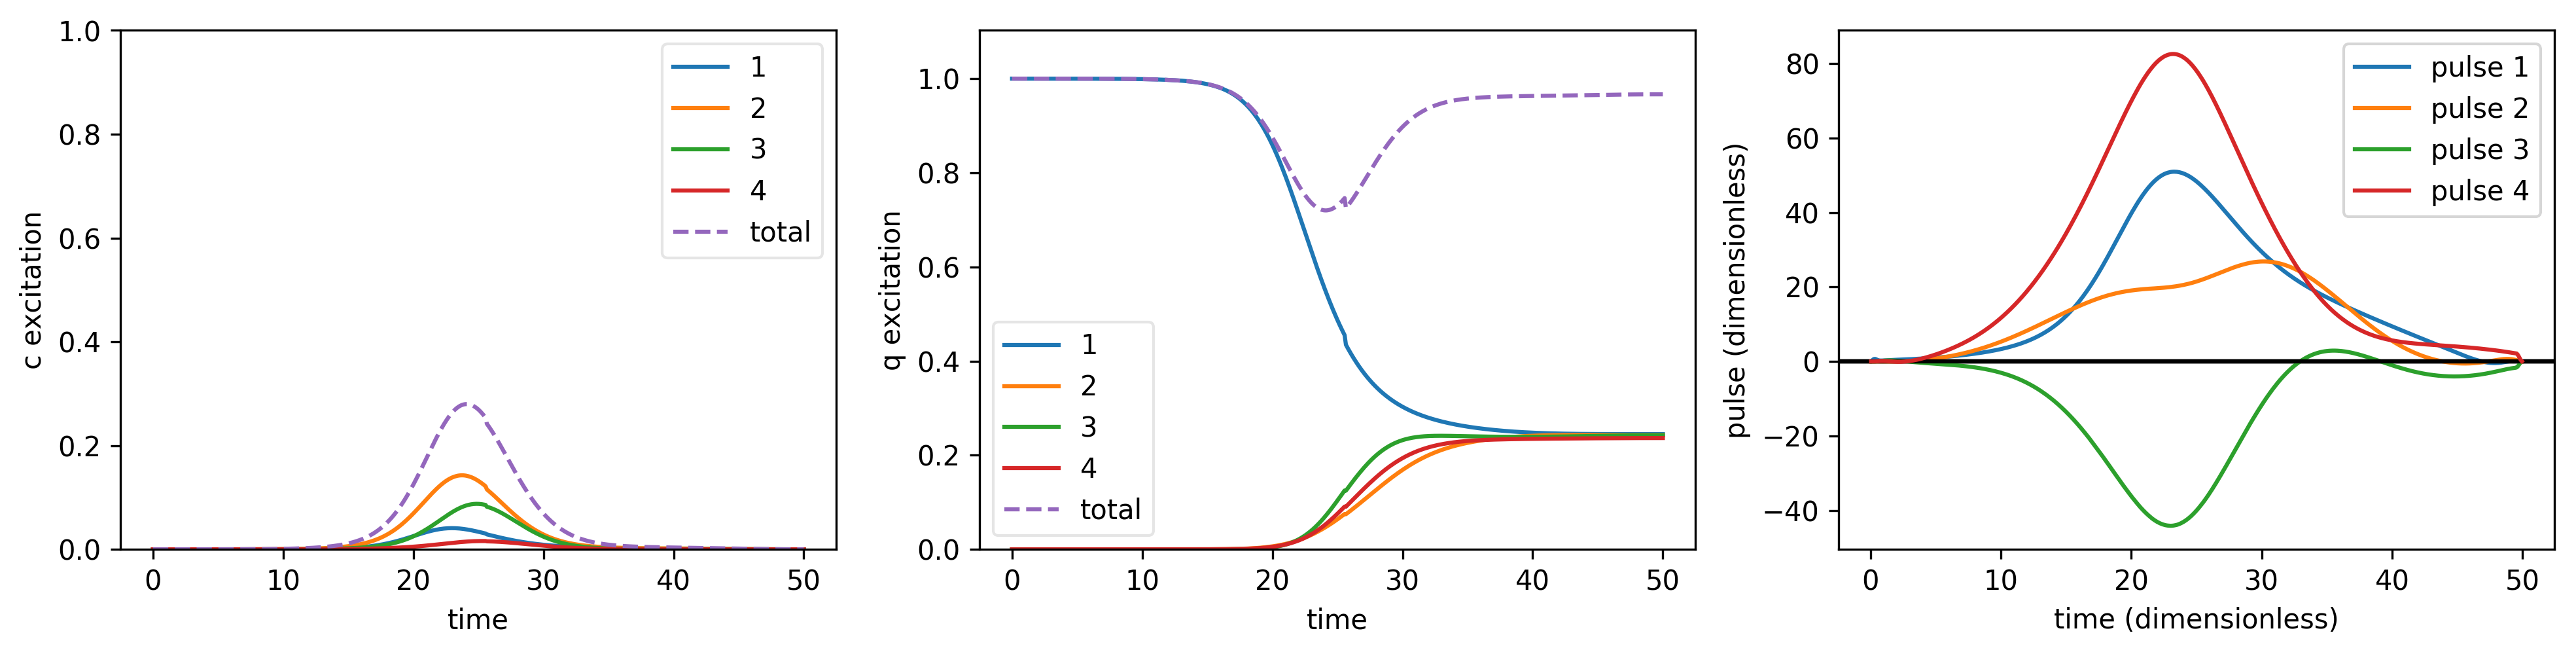

In [7]:
show_summary_dicke('./data/4nodes_single_kappa1e0_T050_traj', dpi=300)

# Example optimization commands

*   density matrix optimization

    ```OMP_NUM_THREADS=1 qdyn_optimize --J_T=J_T_re .```

*   trajectory optimization

    ```OMP_NUM_THREADS=1 mpirun -n 30 qdyn_optimize --n-trajs=30 --J_T=J_T_sm .```
   
*   density matrix propagation

    ```OMP_NUM_THREADS=1 qdyn_prop_traj --use-oct-pulses --write-final-state=state_final.dat .```
    
*   trajectory propagation

    ```OMP_NUM_THREADS=1 mpirun -n 30 qdyn_prop_traj --n-trajs=30 --use-oct-pulses --write-final-state=state_final.dat .```